# K-means Clustering Algorithm

Clustering (or cluster analysis) is a technique that allows us to find groups of similar objects, objects that are more related to each other than to objects in other groups. 

The k-means algorithm belongs to the category of prototype-based clustering.While k-means is very good at identifying clusters with a spherical shape, one of the drawbacks of this clustering algorithm is that we have to specify the number of clusters, k, a priori. 

In [15]:
from IPython.display import Image
Image(url='kmeans3.gif')   

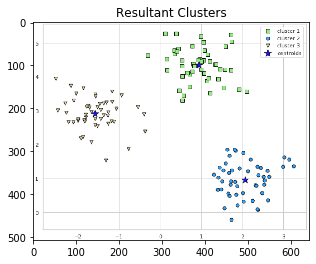

In [16]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('kmeans1.png')
plt.imshow(img)
plt.title("Resultant Clusters")
plt.show()

### Elbow Method

The Elbow Method is a useful graphical tool to estimate the optimal number of clusters k for a given task. Intuitively, we can say that, if k increases, the within-cluster SSE (“distortion”) will decrease. This is because the samples will be closer to the centroids they are assigned to.

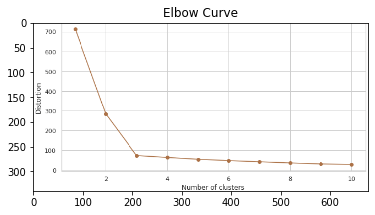

In [17]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('km.png')
plt.imshow(img)
plt.title("Elbow Curve")
plt.show()

## Import Libraries

In [18]:
import numpy as np
import glob
import pickle
from random import randint
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import svm
from numpy import array 
from math import sqrt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

## Split dataset into Train & Validation data

In [19]:
def split_data(dataset):
    np.random.shuffle(dataset.values)
    length= int(0.2*len(dataset))
    train_data = dataset[length:]
    valid_data = dataset[:length]

    return train_data.to_numpy(), valid_data.to_numpy()

## Process Data

In [20]:
data= []
labels= []
path= '/home/smriti/CourseWork/SEMESTER-2/SMAI/Assignment_2/Datasets/Question-6/dataset/*.txt'
files= glob.glob(path)
for file in files:
    params= (np.asarray(file.split("/")))[-1]
    params= (np.asarray(params.split("_")))[-1]
    labels.append((np.asarray(params.split(".")))[0])
    f=open(file, 'r', encoding='utf-8', errors='ignore')  
    data.append(f.read())
    f.close() 

dataset= pd.DataFrame(labels)
df= pd.DataFrame(np.asarray(data))
dataset= pd.concat([dataset, df], axis= 1)

train_data= dataset.to_numpy()

#separate the labels and content from train and validation data respetively
train_labels= train_data[:,0]
train_data= train_data[:,1]


## Perform Word Vectorization

In [21]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_data)

## Term Frequency

In [22]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X)

## Implemention - Sickit Learn

In [23]:
kmeans = KMeans(n_clusters=5, max_iter=10, algorithm = 'auto')
kmeans.fit(X_train_tfidf)

dict= {}
for i in range (0, 5):
    corres= []
    for j in range (0, len(train_labels)):
        if (int(train_labels[j])== (i+1)):
            corres.append(kmeans.labels_[j])
            
    dict[i+1]= max(set(corres), key = corres.count) 
    
labels = kmeans.predict(X_train_tfidf)

correct= 0
for i in range (0, len(labels)):
    if dict.get(int(train_labels[i])) ==labels[i]:
        correct +=1
print ("Accuracy by Scikit Learn= ", correct/len(labels)*100)


Accuracy by Scikit Learn=  85.85507246376811


# Implementation - By Scratch

In [24]:
c1= randint(0, X_train_tfidf.shape[0])
c2= randint(0, X_train_tfidf.shape[0])
c3= randint(0, X_train_tfidf.shape[0])
c4= randint(0, X_train_tfidf.shape[0])
c5= randint(0, X_train_tfidf.shape[0])

c1= X_train_tfidf[c1, :].toarray()
c2= X_train_tfidf[c2, :].toarray()
c3= X_train_tfidf[c3, :].toarray()
c4= X_train_tfidf[c4, :].toarray()
c5= X_train_tfidf[c5, :].toarray()


centroids= np.asarray([c1,c2,c3,c4,c5])
X_train_tfidf= X_train_tfidf.toarray()

## Euclidean Distance

In [25]:
def euclidean_distance(row1, row2):
    distance = 0.0
    row1= row1.flatten()
    for i in range(0,row1.shape[0]):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

## Calculate Accuracy

In [35]:
def check_allocation(train_labels, cluster_allocated):
    total_correct= 0
    for cluster in cluster_allocated:
        cluster= cluster
        frequency= []
        for point in cluster:
            frequency.append(train_labels[point])
            
        max_freq= max(set(frequency), key = frequency.count)
        correct= frequency.count(max_freq)
        total_correct += correct
        
    return total_correct/len(train_labels)

## K_means Algorithm

In [36]:
def KMeans(centroids, data):    
    flag= 0
    for center in centroids:
        dist= []
        for point in range (0, data.shape[0]):
            dist.append(euclidean_distance(np.array(center).T, data[point, :]))
        if flag ==0:
            distances= pd.DataFrame(dist)
            flag= 1
        else:
            df= pd.DataFrame(dist)
            distances= pd.concat([distances, df], axis= 1)


    distances= distances.to_numpy()
    point_mapping= {'1':[], '2':[], '3':[], '4':[], '5':[]}
    cluster_allocated= [[],[],[],[],[]]

    for i in range (0, len(distances)):
        min_dist= np.amin(distances[i, :])
        dist_list= distances[i, :].tolist()
        index= dist_list.index(min_dist)+1
        if len(point_mapping[str(index)])==0:
            point_mapping[str(index)]= pd.DataFrame(data[i,:])
        else:
            df= pd.DataFrame(data[i,:])
            point_mapping[str(index)]= pd.concat([point_mapping[str(index)], df], axis= 1)
        cluster_allocated[index-1].append(i)        

    points_c1= point_mapping['1'].to_numpy().T
    points_c2= point_mapping['2'].to_numpy().T
    points_c3= point_mapping['3'].to_numpy().T
    points_c4= point_mapping['4'].to_numpy().T
    points_c5= point_mapping['5'].to_numpy().T

    c1= []
    c2= []
    c3= []
    c4= []
    c5 =[]

    for cordinate in range(0, data.shape[1]):

        c1.append(np.mean(points_c1[:,cordinate]))

        c2.append(np.mean(points_c2[:,cordinate]))

        c3.append(np.mean(points_c3[:,cordinate]))

        c4.append(np.mean(points_c4[:,cordinate]))

        c5.append(np.mean(points_c5[:,cordinate]))


    centroids= [c1,c2,c3,c4,c5]
    return centroids, cluster_allocated

In [38]:
iterations =0
while iterations< 5:
    centroids, cluster_allocated= KMeans(centroids, X_train_tfidf)
    iterations +=1


accuracy= check_allocation(train_labels , cluster_allocated)

print ("Accuracy from Scratch= ", accuracy*100 , "%")

Accuracy from Scratch=  75.94202898550725 %
